# VARS estimates of Total effect, Morris and Directed Variogram

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, date
import time
import openturns as ot

import pickle
import json
from utils_SA import simulate_model, generate_output_daywise
import openturns as ot
import os
import argparse

from varstool import VARS, Model

path_simulation_result = 'Studies/Sobol_MC_1_InfectedDead.pkl'
path_data = 'data/worldometer_data.txt'

In [78]:

with open(path_simulation_result, 'rb') as f:
    size = pickle.load(f)
    input_factor_names = pickle.load(f)
    distributions = pickle.load(f)
    static_params = pickle.load(f)

parameters = {}
for i in range(len(input_factor_names)):
    parameters[input_factor_names[i]] = [distributions[i].getA(), distributions[i].getB()]

experiment = VARS(
                parameters     = parameters,
                num_stars      = 100,
                delta_h        = 0.01,
                ivars_scales   = (0.1, 0.3, 0.5),
                sampler        = 'lhs',
                seed           = 123456789,
                bootstrap_flag = False,
                bootstrap_size = 100,
                bootstrap_ci   = 0.95,
                grouping_flag  = False,
                #num_grps = 3,
                report_verbose = True,
                )

In [83]:
with open('Studies/VARS/VARS_experiment.pkl', 'rb') as f: 
    experiment = pickle.load(f)

cols = experiment.parameters.keys()
experiment.ivars[cols].to_csv('Studies/VARS/SA_results.csv', index = False )

# IVARS

In [84]:
cols = experiment.ivars.loc[pd.IndexSlice[ ivars_scale ]].sort_values(ascending=False).index

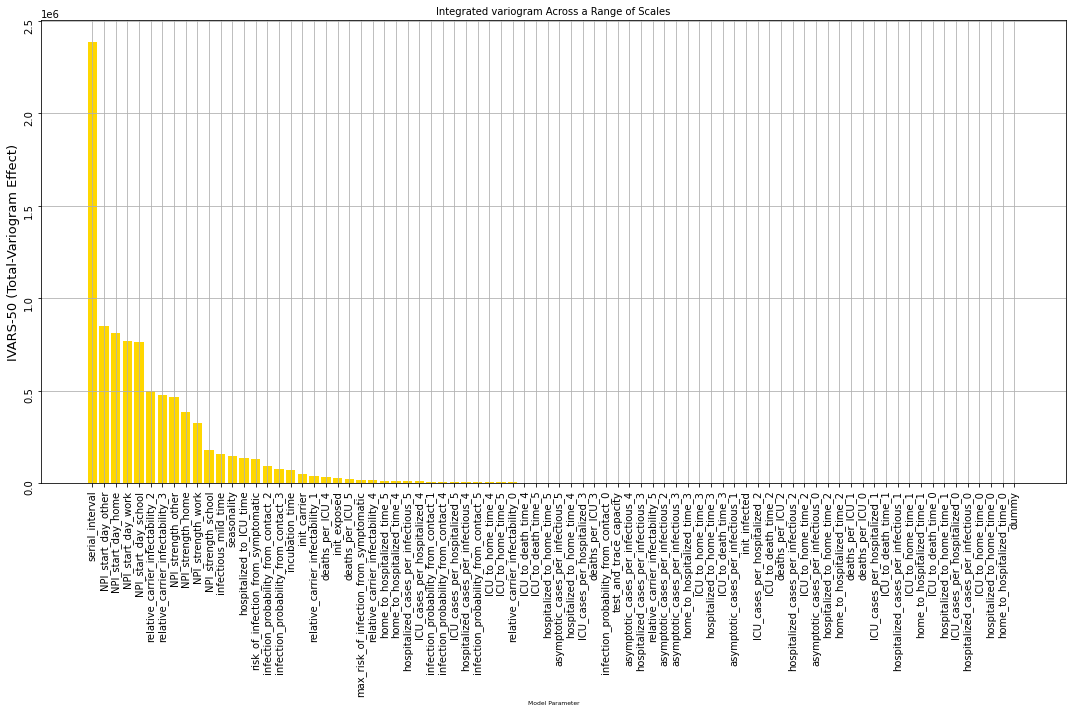

In [85]:


# Plot IVARS 
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5
 
cols = experiment.ivars.loc[pd.IndexSlice[ ivars_scale ]].sort_values(ascending=False).index

fig_bar = plt.figure(figsize=(15,10))
plt.gca().bar(cols, experiment.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 10)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=6)
plt.gca().tick_params(labelrotation=90)
plt.gca().grid()
plt.gca().set_yscale('linear')
plt.tight_layout()
plt.savefig("latex_plots/VARS_50.png")
plt.show()

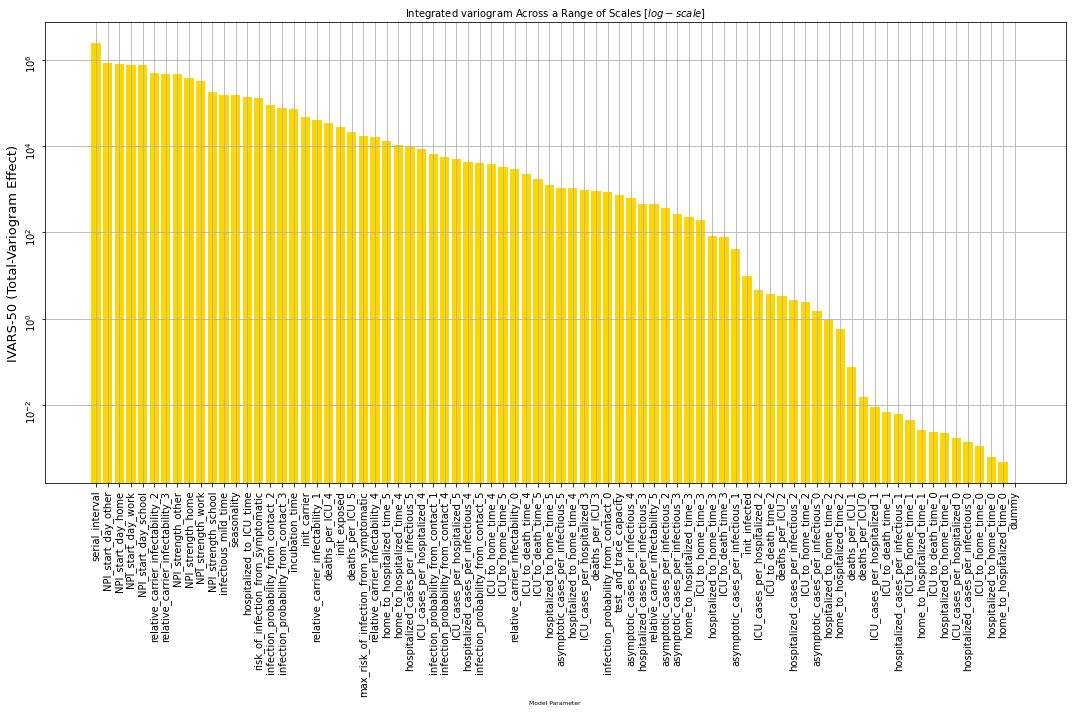

In [18]:
fig_bar = plt.figure(figsize=(15,10))
plt.gca().bar(cols, experiment.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales $[log-scale]$', fontsize = 10)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=6)
plt.gca().tick_params(labelrotation=90)
plt.gca().grid()
plt.gca().set_yscale('log')
plt.tight_layout()

plt.savefig("latex_plots/VARS_50_log.png")
plt.show()

# Directional Variogram

<class 'pandas.core.frame.DataFrame'>


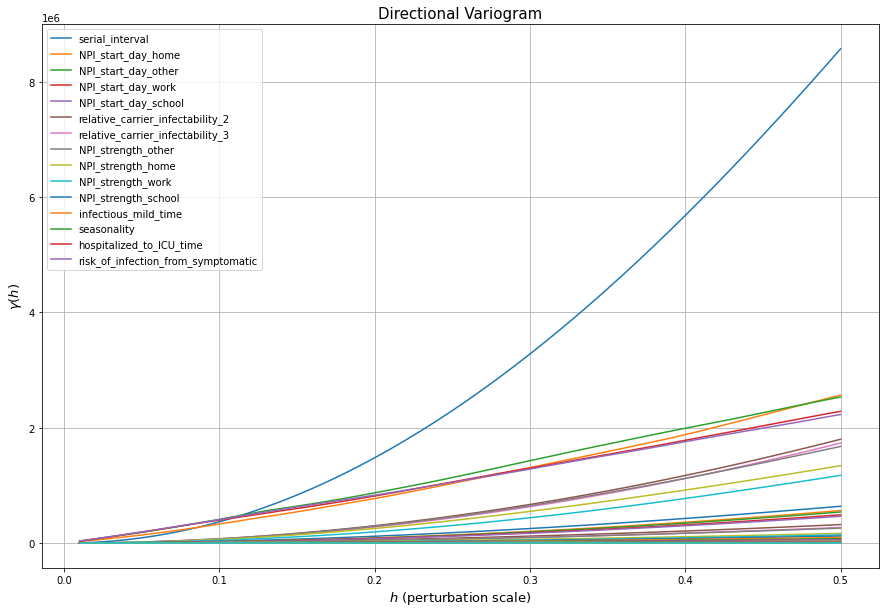

In [75]:
# Directional Variograms
cols = variograms1.loc[0.5].sort_values(ascending=False).index
variograms1 = experiment.gamma.unstack(0)[cols].copy()
print(type(variograms1))
plotting_scale = 0.5 # any number between delta_h and one.

matrix_y = variograms1.loc[variograms1.index <= plotting_scale].to_numpy()
column_x = variograms1.loc[variograms1.index <= plotting_scale].index.to_numpy()
matrix_x = np.tile(column_x, (matrix_y.shape[1], 1)).T

fig_cdf = plt.figure(figsize=(15,10))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().legend (cols[:15], loc='upper left', fontsize = 10)
plt.gca().grid()
plt.savefig("latex_plots/VARS_directional.png")
plt.show()


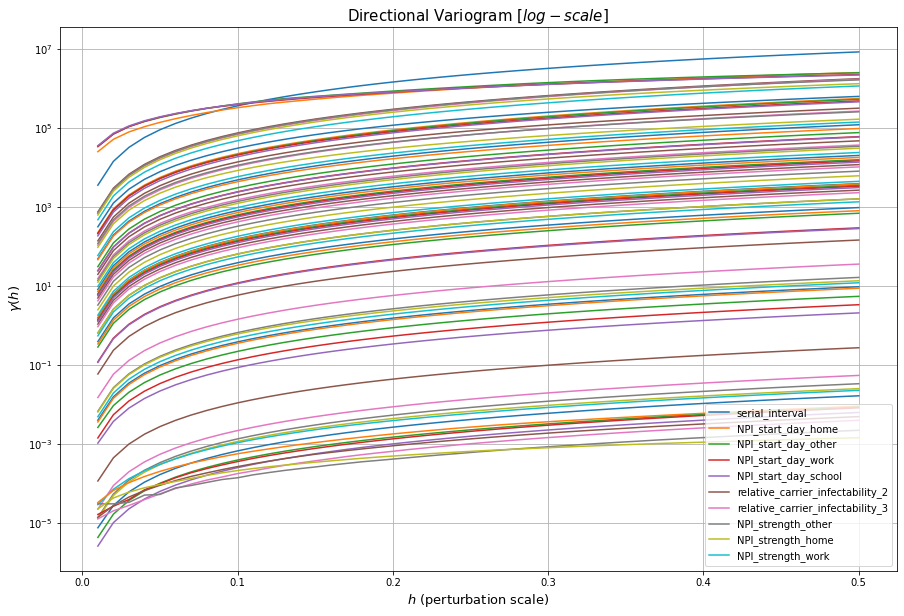

In [76]:
fig_cdf = plt.figure(figsize=(15,10))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().legend (cols[:10], loc='lower right', fontsize = 10)
plt.gca().grid()
plt.savefig("latex_plots/VARS_directional_log.png")
plt.show()

# Sobol Total Order

In [34]:
cols = experiment.st.to_frame().T.iloc[0].sort_values(ascending=False).index

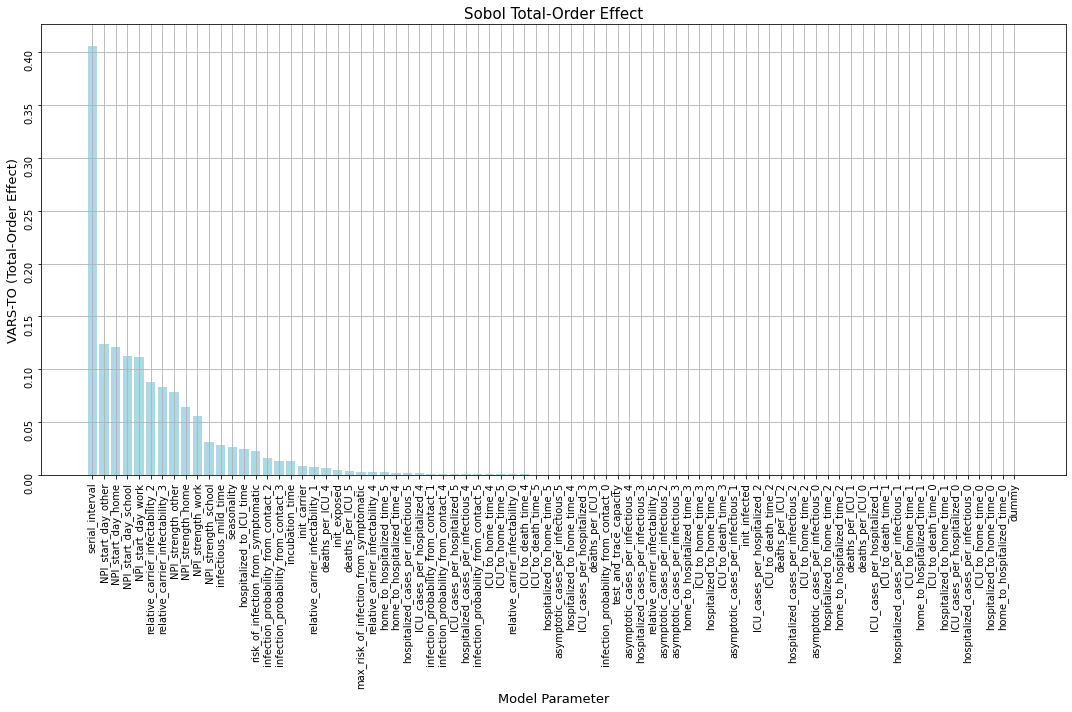

In [35]:
# Plot VARS-TO               
fig_bar = plt.figure(figsize=(15,10))
plt.gca().bar(cols, experiment.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().tick_params(labelrotation=90)
plt.gca().grid()
plt.gca().set_yscale('linear')
plt.tight_layout()
plt.savefig("latex_plots/VARS_TotolOrder.png")
plt.show()

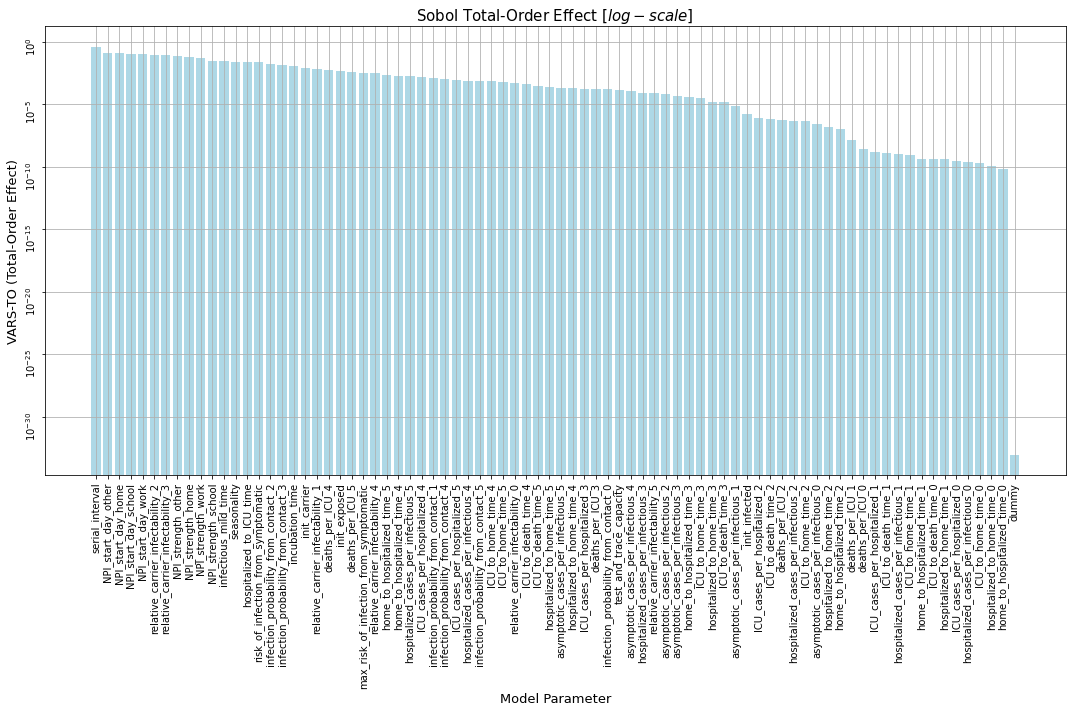

In [38]:
fig_bar = plt.figure(figsize=(15,10))
plt.gca().bar(cols, experiment.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().tick_params(labelrotation=90)
plt.gca().grid()
plt.gca().set_yscale('log')
plt.tight_layout()
plt.savefig("latex_plots/VARS_TotolOrder_log.png")
plt.show()

# VARS-ABE & VARS-ACE: Morris Elementary Effects

Estimation of $\mu, \mu*$

In [57]:
cols = experiment.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0].sort_values(ascending=False).index.droplevel(0)
#cols

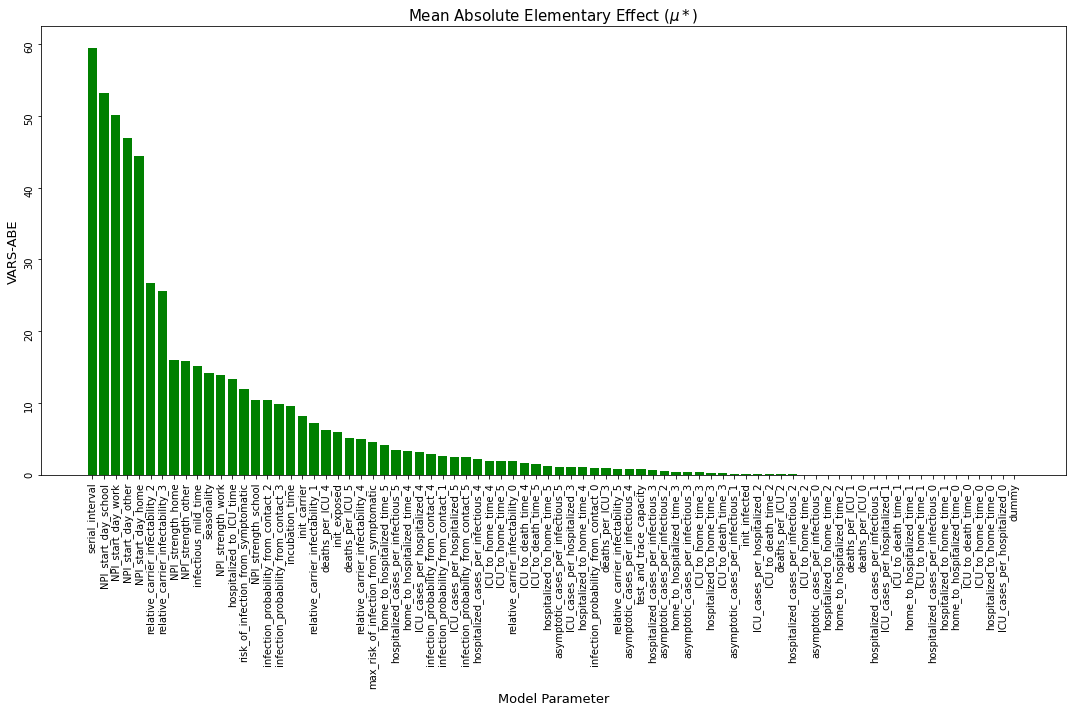

In [67]:
delta_of_interest = 0.01
# Plot VARS-ACE and  VARS-ABE from Experiment 1
                
fig_bar = plt.figure(figsize=(15,10))
plt.gca().bar(cols, experiment.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0].droplevel(0)[cols], color='green')
plt.gca().set_title (r'Mean Absolute Elementary Effect ($\mu*$)', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ABE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

plt.gca().tick_params(labelrotation=90)
plt.gca().grid()
plt.tight_layout()
plt.savefig("latex_plots/VARS_MAEE.png")
plt.show()

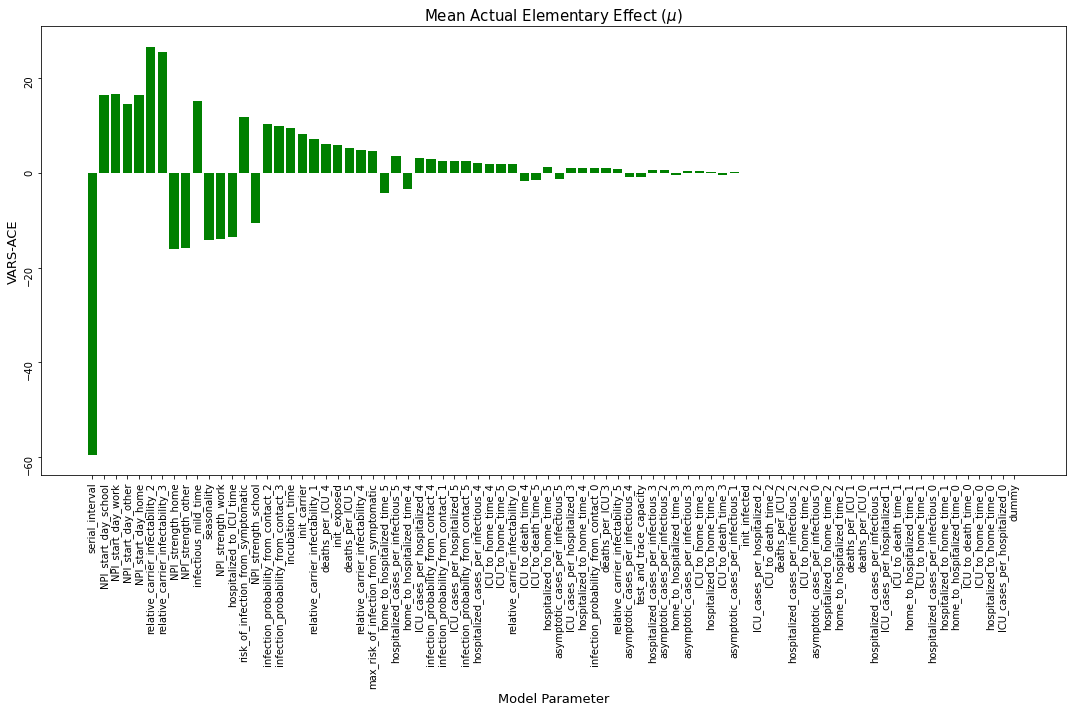

In [68]:

fig_bar = plt.figure(figsize=(15,10))
plt.gca().bar(cols, experiment.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0].droplevel(0)[cols], color='green')

plt.gca().set_title (r'Mean Actual Elementary Effect ($\mu$)', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ACE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

plt.gca().tick_params(labelrotation=90)
plt.gca().grid()
plt.tight_layout()
plt.savefig("latex_plots/VARS_MEE.png")
plt.show()

# Infected

In [86]:
with open('Studies/VARS/VARS_experiment_infected.pkl', 'rb') as f: 
    experiment = pickle.load(f)

In [87]:
cols = experiment.ivars.loc[pd.IndexSlice[ ivars_scale ]].sort_values(ascending=False).index

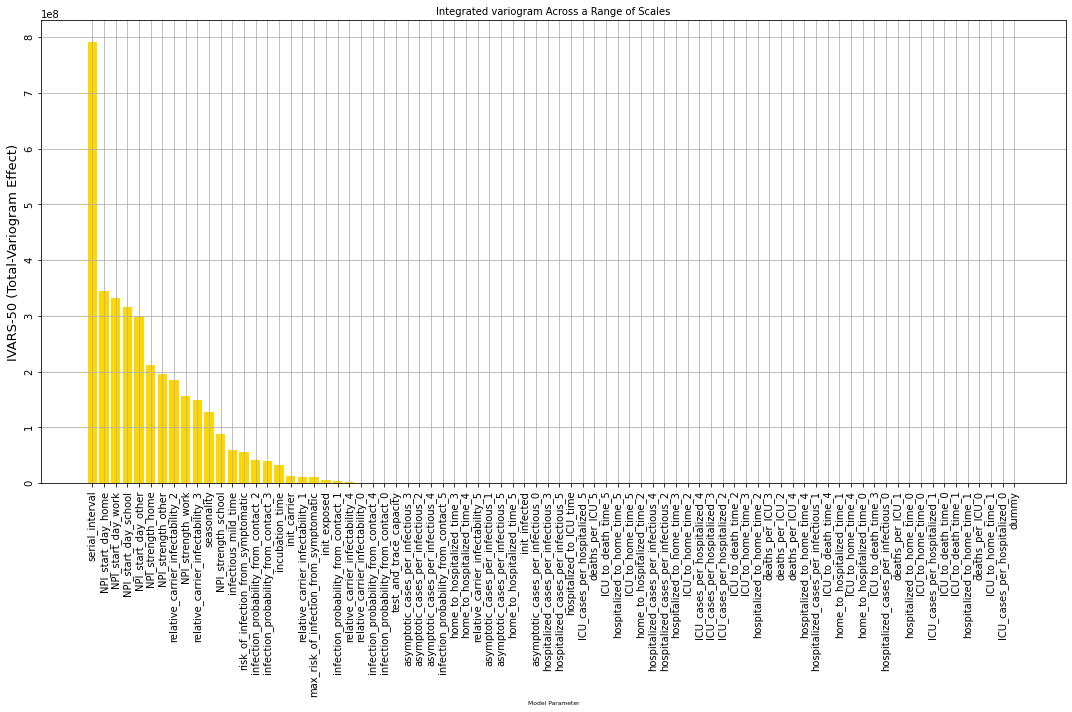

In [88]:
# Plot IVARS 
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5
 
cols = experiment.ivars.loc[pd.IndexSlice[ ivars_scale ]].sort_values(ascending=False).index

fig_bar = plt.figure(figsize=(15,10))
plt.gca().bar(cols, experiment.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 10)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=6)
plt.gca().tick_params(labelrotation=90)
plt.gca().grid()
plt.gca().set_yscale('linear')
plt.tight_layout()
plt.savefig("latex_plots/VARS_50_infected.png")
plt.show()

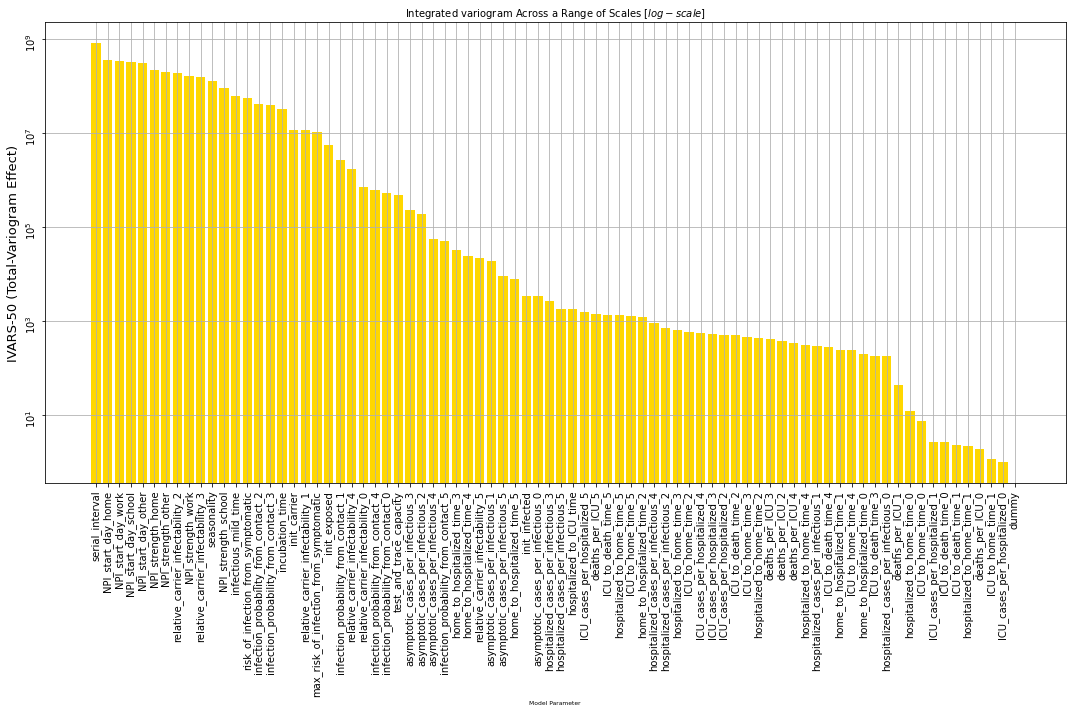

In [89]:
fig_bar = plt.figure(figsize=(15,10))
plt.gca().bar(cols, experiment.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales $[log-scale]$', fontsize = 10)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=6)
plt.gca().tick_params(labelrotation=90)
plt.gca().grid()
plt.gca().set_yscale('log')
plt.tight_layout()

plt.savefig("latex_plots/VARS_50_infected_log.png")
plt.show()

# Directed Variogram

<class 'pandas.core.frame.DataFrame'>


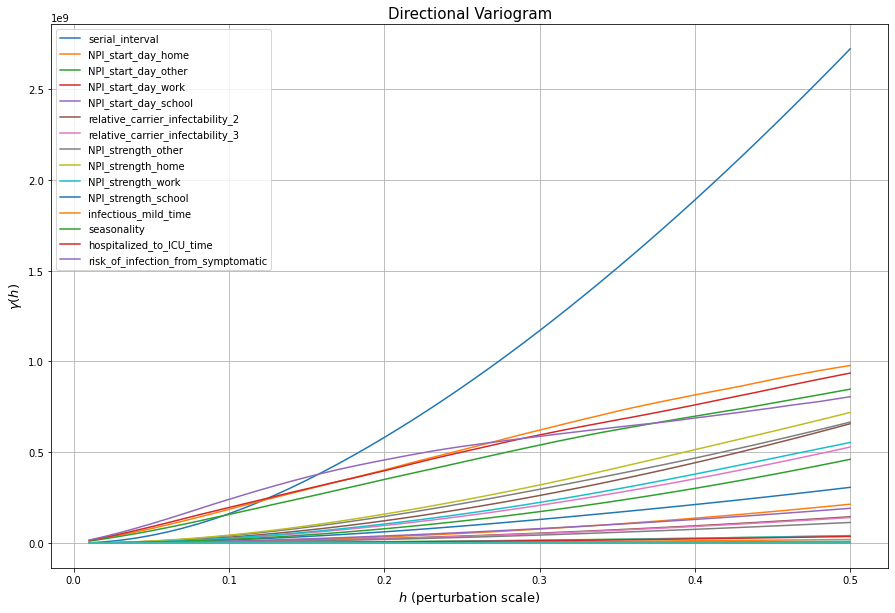

In [90]:
# Directional Variograms
cols = variograms1.loc[0.5].sort_values(ascending=False).index
variograms1 = experiment.gamma.unstack(0)[cols].copy()
print(type(variograms1))
plotting_scale = 0.5 # any number between delta_h and one.

matrix_y = variograms1.loc[variograms1.index <= plotting_scale].to_numpy()
column_x = variograms1.loc[variograms1.index <= plotting_scale].index.to_numpy()
matrix_x = np.tile(column_x, (matrix_y.shape[1], 1)).T

fig_cdf = plt.figure(figsize=(15,10))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().legend (cols[:15], loc='upper left', fontsize = 10)
plt.gca().grid()
plt.savefig("latex_plots/VARS_directional_infected.png")
plt.show()

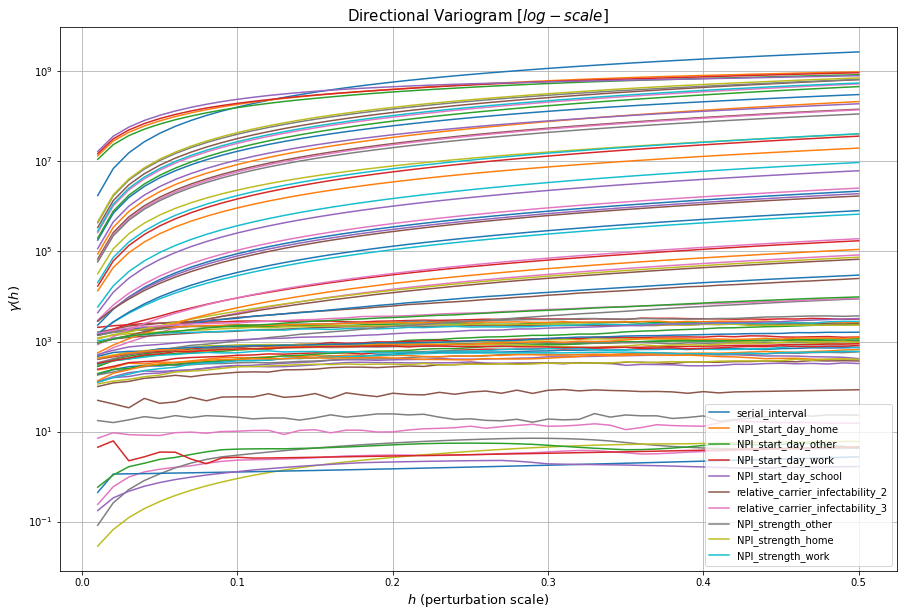

In [91]:
fig_cdf = plt.figure(figsize=(15,10))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().legend (cols[:10], loc='lower right', fontsize = 10)
plt.gca().grid()
plt.savefig("latex_plots/VARS_directional_infected_log.png")
plt.show()